## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [238]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [239]:
a=-1;b=2
x=np.linspace(0,20)
x=x.reshape((x.shape[0]),1)
y=((a*x)+b).reshape((x.shape[0]),1)

#### Plot your data points. 

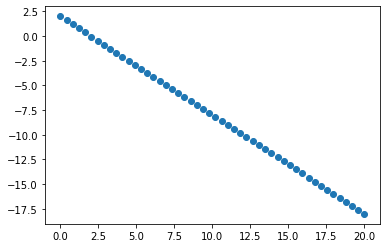

In [240]:
plt.scatter(x,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [241]:
alpha=0.001
max_iterations=1000

def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = np.zeros((1,))
    return w, b

def h(w,b,x):
    y_pred = np.dot(x,w) + b
    return y_pred

def cost(w, b, x, y,y_pred ):
    m= x.shape[0]
    j= np.sum((y_pred-y)**2)/(2*m)
    return j

def gradient(x, y,y_pred ):
    m = x.shape[0]
    res = y_pred- y
    dw = 1/m * np.dot(x.T,res)
    db = 1/m * np.sum(res)
    return dw,db

def update_parameters(w,b,dw,db,alpha):
    w = w - alpha * dw
    b = b - alpha * db
    return w,b

def model(x,y):
    loss = []
    w_list=[]
    b_list=[]
    y_pred_list=[]

    w,b = initialize_with_zeros(x.shape[1])
    for i in range(max_iterations) :
        y_pred=h(w,b,x)
        j = cost(w,b, x, y,y_pred )
        loss.append(j)
        dw, db = gradient(x, y,y_pred)
        w,b = update_parameters(w,b , dw,db,  alpha)
        w_list.append(w)
        b_list.append(b)
        plt.plot(x,y_pred)

        
    return w,b,loss,w_list,b_list

def my_r2_score(y,y_pred):
    ssr = np.sum((y_pred - y)**2)
    sst = np.sum((y - np.mean(y))**2)
    r2_score = 1 - (ssr/sst)
    return r2_score

w,b [[-0.8649981]] [0.18506527]


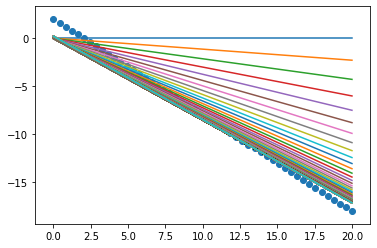

In [242]:
#Fitting the model for batch gradeint descent
alpha=0.001
max_iterations=500
w,b,loss,w_list,b_list = model(x,y)
print("w,b",w,b)
plt.scatter(x, y)


In [243]:
#calculating r2 score
r=my_r2_score(y, h(w,b,x))
print("my r2 score",r)

my r2 score 0.9755443780136139


Text(0, 0.5, 'Loss')

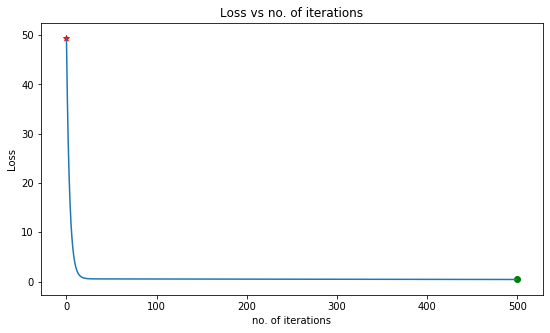

In [244]:
#plotting loss vs epochs
plt.figure(figsize=(9, 5))
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

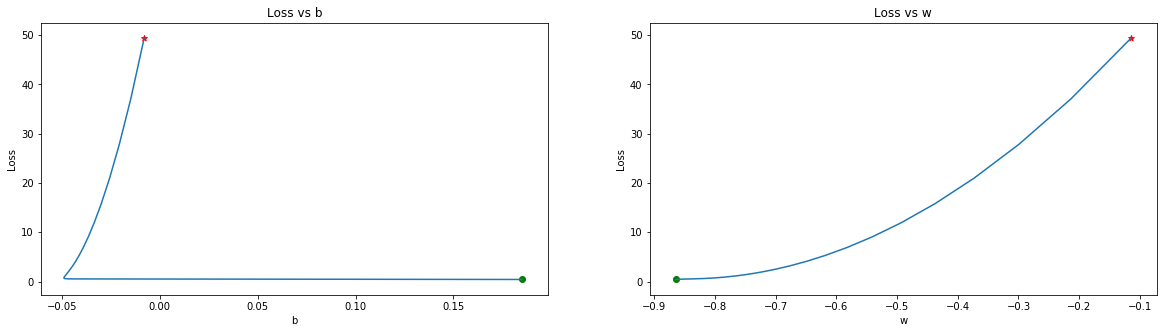

In [245]:
#plotting loss vs b
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(122)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



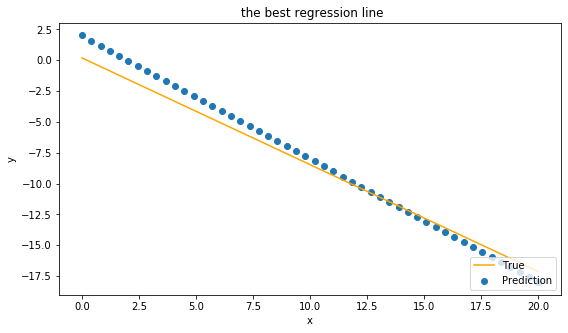

In [246]:
#plotting the best regression line
plt.figure(figsize=(9, 5))
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")


### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

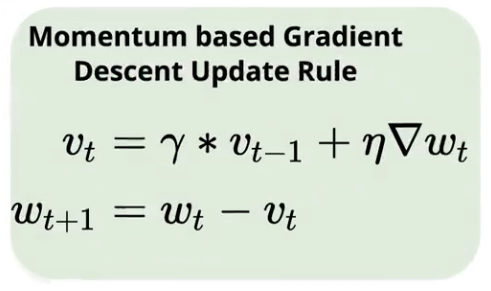

#### γ takes values between 0 and 1.
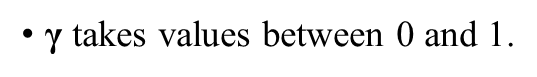

In [253]:
def update_parameters_momentum(w, b, dw, db, alpha, vw, vb, gamma):
    vw = gamma * vw + alpha * dw
    vb = gamma * vb + alpha * db
    w = w - vw
    b = b - vb
    return w, b, vw, vb


def Gd_momentum(x, y):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []

    w, b = initialize_with_zeros(x.shape[1])
    vw = 0
    vb = 0
    for i in range(max_iterations):
        y_pred = h(w, b, x)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        w, b, vw, vb = update_parameters_momentum(w, b, dw, db, alpha, vw, vb,
                                                  gamma)
        w_list.append(w)
        b_list.append(b)
        plt.plot(x, y_pred)

    return w, b, loss, w_list, b_list

w,b [[-0.95771591]] [1.4315423]


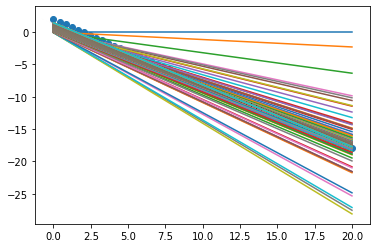

In [254]:
#Fitting the model for batch gradeint descent with momentum
alpha=0.001
max_iterations=500
gamma=0.9
w,b,loss,w_list,b_list = Gd_momentum(x,y)
print("w,b",w,b)
plt.scatter(x, y)

In [255]:
#calculating r2 score
r=my_r2_score(y, h(w,b,x))
print("my r2 score",r)

my r2 score 0.997600874372176


Text(0, 0.5, 'Loss')

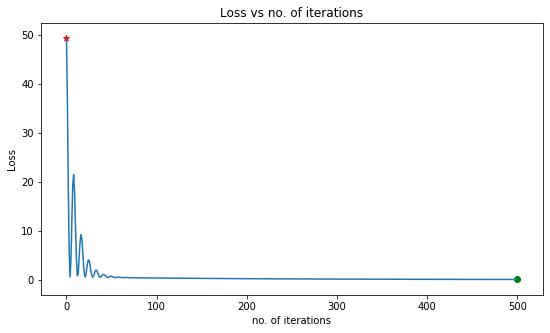

In [256]:
#plotting loss vs epochs
plt.figure(figsize=(9, 5))
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

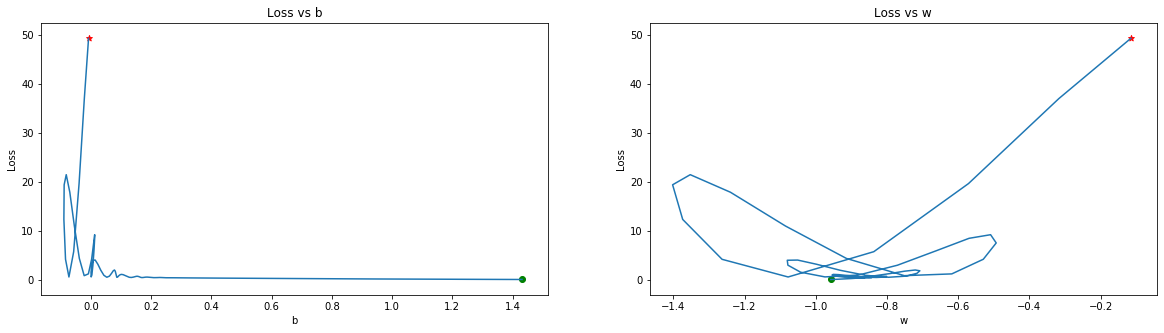

In [257]:
#plotting loss vs b
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(122)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")


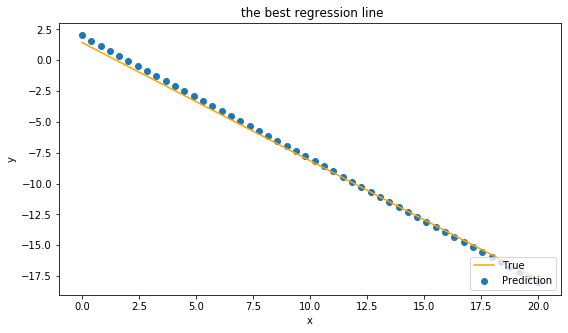

In [258]:
#plotting the best regression line
plt.figure(figsize=(9, 5))
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")


#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

w,b [[-0.8649981]] [0.18506527]


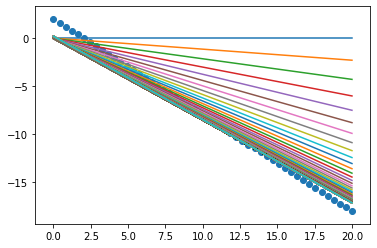

In [259]:
#Fitting the model for batch gradeint descent with momentum with different values for momentum
alpha=0.001
max_iterations=500
gamma=0
w,b,loss,w_list,b_list = Gd_momentum(x,y)
print("w,b",w,b)
plt.scatter(x, y)

In [260]:
#calculating r2 score
r=my_r2_score(y, h(w,b,x))
print("my r2 score",r)

my r2 score 0.9755443780136139


Text(0, 0.5, 'Loss')

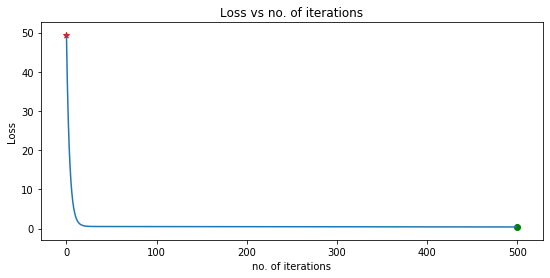

In [261]:
#plotting loss vs epochs
plt.figure(figsize=(9, 4))
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

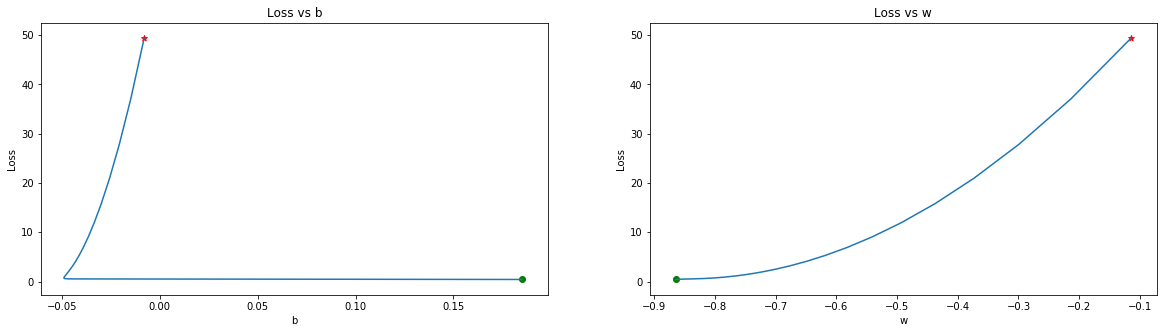

In [262]:
#plotting loss vs b
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(122)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

with gamma = 0 it is the same as gradient descent without momentum 

### Update your Batch GD for one variable  implementation to be NAG and check your results

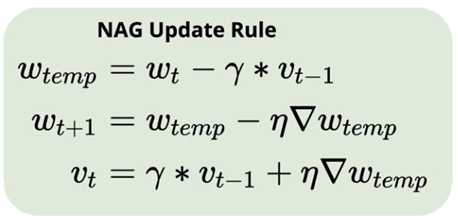

In [247]:
def update_parameters_nag(w, b, dw, db, alpha, vw, vb, gamma):
    w = w - alpha * dw
    b = b - alpha * db
    vw = gamma * vw + alpha * dw
    vb = gamma * vb + alpha * db

    return w, b, vw, vb


def Gd_NAG(x, y):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []

    w, b = initialize_with_zeros(x.shape[1])
    vw = 0
    vb = 0
    for i in range(max_iterations):
        w = w - gamma * vw
        b = b - gamma * vb
        y_pred = h(w, b, x)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        w, b, vw, vb = update_parameters_nag(w, b, dw, db, alpha, vw, vb,
                                             gamma)
        w_list.append(w)
        b_list.append(b)
        plt.plot(x, y_pred)

    return w, b, loss, w_list, b_list

w,b [[-0.91894664]] [0.91033718]


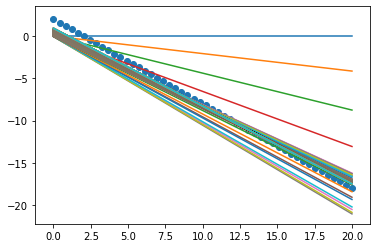

In [248]:
#Fitting the model for batch gradeint descent with NAG 
alpha=0.001
max_iterations=500
gamma=0.8
w,b,loss,w_list,b_list = Gd_NAG(x,y)
print("w,b",w,b)
plt.scatter(x, y)

In [249]:
#calculating r2 score
r=my_r2_score(y, h(w,b,x))
print("my r2 score",r)

my r2 score 0.9911846216311384


Text(0, 0.5, 'Loss')

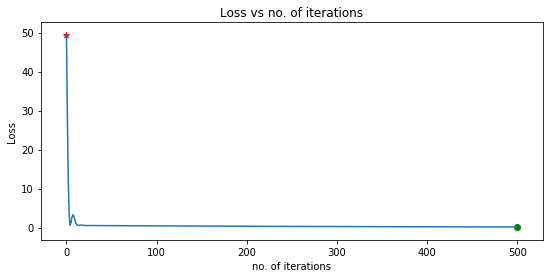

In [250]:
#plotting loss vs epochs
plt.figure(figsize=(9, 4))
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

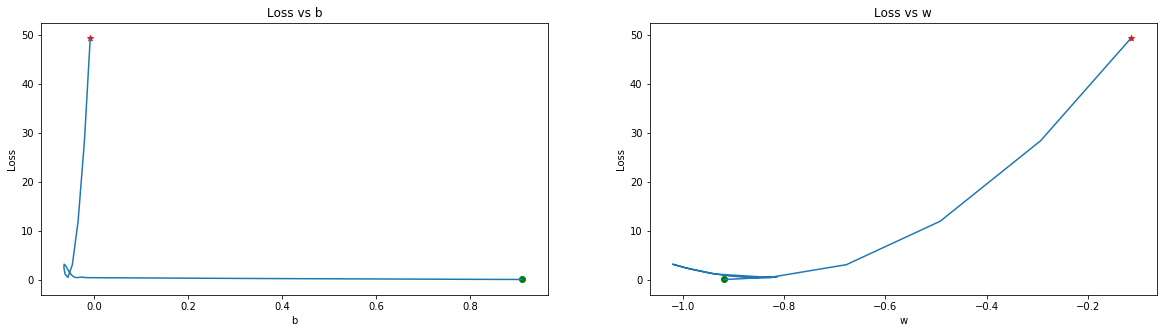

In [251]:
#plotting loss vs b
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(122)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

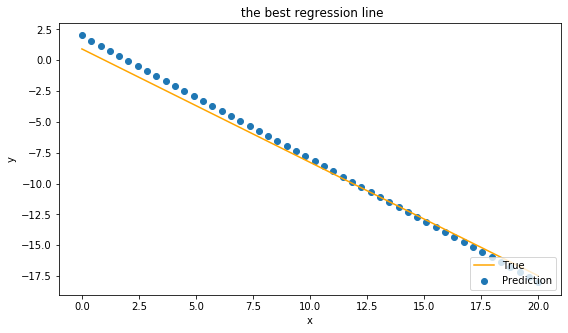

In [252]:
#plotting the best regression line
plt.figure(figsize=(9, 5))
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")


## Congratulations 
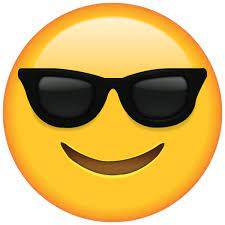